In [38]:
import os 
import pandas as pd
import numpy as np

###### Lets import important module and add in working location as usual.  Here we will use the dataframe that I previously processed in Step1
Here I removed some of the columns that I probably won't be using

In [39]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
#df = pd.read_csv(one_level_up + '\\data\\processed\\09122020_processed_tweets.csv', index_col=0)
df = pd.read_pickle(one_level_up + '\\data\\processed\\09122020_processed_tweets.pickle')
df = df.drop(['tweet','punct','token'], axis  = 1)
df


,politican,Party,State,retweet,tweet_web_r,ARI,DCR,TS,lem_token
0,Lisa Murkowski,R,AK,False,Congrats to Petersburg Medical Center CEO Phil...,13.5,9.79,9.79,"[Congrats, Petersburg, Medical, Center, CEO, P..."
1,Lisa Murkowski,R,AK,False,The changes made by this legislation will go a...,10.6,8.44,8.44,"[The, change, made, legislation, go, long, way..."
2,Lisa Murkowski,R,AK,False,I’m proud to introduce the Tribal Health Data ...,14.8,10.98,10.98,"[Im, proud, introduce, Tribal, Health, Data, I..."
3,Lisa Murkowski,R,AK,False,American Indian &amp; Alaska Native communitie...,11.6,9.63,9.63,"[American, Indian, amp, Alaska, Native, commun..."
4,Lisa Murkowski,R,AK,False,Congrats to Alaskans Eddy Falcon Jr. and Tafil...,11.4,10.16,10.16,"[Congrats, Alaskans, Eddy, Falcon, Jr, Tafilis..."
...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,D,P,False,"Just stay focused, folks.\n\nLet’s get to work...",4.9,6.78,6.78,"[Just, stay, focused, folk, Lets, get, work, J..."
17120,Joe Biden,D,P,False,Donald Trump is unfit to lead our nation. But ...,1.4,6.99,6.99,"[Donald, Trump, unfit, lead, nation, But, dont..."
17121,Joe Biden,D,P,False,.@realDonaldTrump it didn’t have to be this bad.,6.7,7.98,7.98,"[realDonaldTrump, didnt, bad]"
17122,Joe Biden,D,P,False,The only person responsible for our failed COV...,9.3,8.18,8.18,"[The, person, responsible, failed, COVID, resp..."


###### Ok Now we have the data frame.  Let see if we can run some sentiment code and evalute the sentiment of the tweets

In [40]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['tweet_web_r'].apply(analyser.polarity_scores)
compound_score = []
sentiment_score = list(df['sentiment_score'])

for i in range(len(df['sentiment_score'])):
    compound_score.append(sentiment_score[i]['compound'])
    
df['sentiment_score'] = compound_score
df

,politican,Party,State,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score
0,Lisa Murkowski,R,AK,False,Congrats to Petersburg Medical Center CEO Phil...,13.5,9.79,9.79,"[Congrats, Petersburg, Medical, Center, CEO, P...",0.7650
1,Lisa Murkowski,R,AK,False,The changes made by this legislation will go a...,10.6,8.44,8.44,"[The, change, made, legislation, go, long, way...",0.4215
2,Lisa Murkowski,R,AK,False,I’m proud to introduce the Tribal Health Data ...,14.8,10.98,10.98,"[Im, proud, introduce, Tribal, Health, Data, I...",0.8316
3,Lisa Murkowski,R,AK,False,American Indian &amp; Alaska Native communitie...,11.6,9.63,9.63,"[American, Indian, amp, Alaska, Native, commun...",0.0000
4,Lisa Murkowski,R,AK,False,Congrats to Alaskans Eddy Falcon Jr. and Tafil...,11.4,10.16,10.16,"[Congrats, Alaskans, Eddy, Falcon, Jr, Tafilis...",0.6705
...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,D,P,False,"Just stay focused, folks.\n\nLet’s get to work...",4.9,6.78,6.78,"[Just, stay, focused, folk, Lets, get, work, J...",0.5859
17120,Joe Biden,D,P,False,Donald Trump is unfit to lead our nation. But ...,1.4,6.99,6.99,"[Donald, Trump, unfit, lead, nation, But, dont...",0.0000
17121,Joe Biden,D,P,False,.@realDonaldTrump it didn’t have to be this bad.,6.7,7.98,7.98,"[realDonaldTrump, didnt, bad]",-0.6280
17122,Joe Biden,D,P,False,The only person responsible for our failed COV...,9.3,8.18,8.18,"[The, person, responsible, failed, COVID, resp...",-0.2500


In [41]:
df.retweet.sum()  # sanity check for whether if it is retweet or not

0

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

<br>positive sentiment : (compound score >= 0.05)
<br>neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
<br>negative sentiment : (compound score <= -0.05)

<br>Now we have positive negative and neutral let see if we can see the trend on different politician

In [42]:
leaders = ['Mitch McConnell','Mike Pence','Donald Trump', 'Joe Biden', 'Bernard Sanders','Kamala D. Harris', 
                 'Elizabeth Warren','Ted Cruz' ]

In [43]:
def sentiment_grouping(sentiment_compound):
    if sentiment_compound >= 0.05:
        return 'Positive'
    elif (sentiment_compound > -0.05 and sentiment_compound < 0.05):
        return 'Neutral'
    elif sentiment_compound <= -0.05:
        return 'Negative'

df['sentiment'] = df['sentiment_score'].apply(sentiment_grouping)
leader_df = df[df['politican'].isin(leaders)]
leader_df.groupby(['politican', 'sentiment']).count()['Party']

politican         sentiment
Bernard Sanders   Negative      88
                  Neutral       31
                  Positive      59
Donald Trump      Negative      31
                  Neutral       19
                  Positive      60
Elizabeth Warren  Negative      92
                  Neutral       35
                  Positive      47
Joe Biden         Negative      65
                  Neutral       38
                  Positive      88
Kamala D. Harris  Negative      73
                  Neutral       22
                  Positive      55
Mike Pence        Negative      12
                  Neutral       13
                  Positive      39
Mitch McConnell   Negative      67
                  Neutral       22
                  Positive     105
Ted Cruz          Negative      47
                  Neutral       27
                  Positive      56
Name: Party, dtype: int64

Ok we see that most of the people tweets are positive except for Warren who has more negative than positive tweets, also i remove a lot of retweet from donald trump...  perhaps we shouldn't remove retweet or perhaps we need to get more data

######  Ok i just realized the since i import and export we turn token into string now we have to convert it back to list.  In addition we also turn the word to lower to help us out  

###### this part has been mitigate because now i use pickle file

import string
import re

pattern = r"[{}]".format(string.punctuation)
#final_df.tweet_web_r.str.replace(pattern, '')
df['lem_token'] = df['lem_token'].str.lower()
df['lem_token'] = df['lem_token'].str.replace(pattern,'')
#df['lem_token'].str.split(" ")
df['lem_token'] = df['lem_token'].str.split(" ")
df

I am going to redo the stop word once again because the lower case issue

In [44]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
df['lem_token'] = df['lem_token'].apply(lambda words: [word.lower() for word in words])
df['lem_token'] = df.lem_token.apply(lambda tokens: [w for w in tokens if not w in stop_words])
df

,politican,Party,State,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score,sentiment
0,Lisa Murkowski,R,AK,False,Congrats to Petersburg Medical Center CEO Phil...,13.5,9.79,9.79,"[congrats, petersburg, medical, center, ceo, p...",0.7650,Positive
1,Lisa Murkowski,R,AK,False,The changes made by this legislation will go a...,10.6,8.44,8.44,"[change, made, legislation, go, long, way, imp...",0.4215,Positive
2,Lisa Murkowski,R,AK,False,I’m proud to introduce the Tribal Health Data ...,14.8,10.98,10.98,"[im, proud, introduce, tribal, health, data, i...",0.8316,Positive
3,Lisa Murkowski,R,AK,False,American Indian &amp; Alaska Native communitie...,11.6,9.63,9.63,"[american, indian, amp, alaska, native, commun...",0.0000,Neutral
4,Lisa Murkowski,R,AK,False,Congrats to Alaskans Eddy Falcon Jr. and Tafil...,11.4,10.16,10.16,"[congrats, alaskans, eddy, falcon, jr, tafilis...",0.6705,Positive
...,...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,D,P,False,"Just stay focused, folks.\n\nLet’s get to work...",4.9,6.78,6.78,"[stay, focused, folk, lets, get, work, join, c...",0.5859,Positive
17120,Joe Biden,D,P,False,Donald Trump is unfit to lead our nation. But ...,1.4,6.99,6.99,"[donald, trump, unfit, lead, nation, dont, tak...",0.0000,Neutral
17121,Joe Biden,D,P,False,.@realDonaldTrump it didn’t have to be this bad.,6.7,7.98,7.98,"[realdonaldtrump, didnt, bad]",-0.6280,Negative
17122,Joe Biden,D,P,False,The only person responsible for our failed COV...,9.3,8.18,8.18,"[person, responsible, failed, covid, response,...",-0.2500,Negative


Now, we generated a bag of word of republican and a bag of word for democrats

In [45]:
import collections

#politican = ['Trump','Biden','Sanders','Warren','McConell','Cruz','Pence']
### over we found out that Pence doesn't actually tweet.  All he does is retweet himself.... so we actually 
### collect data from wrong twitter account

dem_leaders = ['Joe Biden', 'Bernard Sanders','Kamala D. Harris', 'Elizabeth Warren']
rep_leaders = ['Mitch McConnell','Mike Pence','Donald Trump','Ted Cruz' ]

dem_top20_BOW = {}
dem_BOW = []
for idx, name in enumerate(dem_leaders):
    person_BOW = df[df['politican'] == name].lem_token.sum()
    person_BOW = collections.Counter(person_BOW).most_common(20)
    person_BOW = [x[0] for x in person_BOW]
    dem_top20_BOW[name] =  person_BOW
    dem_BOW.append(person_BOW)
dem_top20_BOW
dem_BOW = [word for words_list in dem_BOW for word in words_list]
#dem_BOW.remove('—')
dem_BOW

['president',
 'trump',
 'donald',
 '—',
 'america',
 'nation',
 'people',
 'year',
 'time',
 'violence',
 'safe',
 'american',
 'need',
 'know',
 'covid19',
 'come',
 'u',
 'country',
 'day',
 'make',
 'million',
 'trump',
 'pandemic',
 'people',
 'senate',
 'billion',
 'health',
 'today',
 'americans',
 'right',
 'trumps',
 'coronavirus',
 'need',
 'republicans',
 'u',
 'worker',
 'economic',
 'tax',
 'want',
 'year',
 'california',
 'wildfire',
 'across',
 'year',
 'million',
 'family',
 'one',
 'still',
 'lost',
 'devastating',
 'day',
 'people',
 'life',
 'community',
 'pandemic',
 'census',
 'today',
 'fire',
 'im',
 'to…',
 'amp',
 'usps',
 'covid19',
 'trump',
 'dejoy',
 'need',
 'people',
 'im',
 'louis',
 'trumps',
 'year',
 'americans',
 'postmaster',
 'worker',
 'public',
 'health',
 'make',
 'general',
 '–',
 'right']

In [46]:
rep_top20_BOW = {}
rep_BOW = []
for idx, name in enumerate(rep_leaders):
    person_BOW = df[df['politican'] == name].lem_token.sum()
    person_BOW = collections.Counter(person_BOW).most_common(20)
    person_BOW = [x[0] for x in person_BOW]
    rep_top20_BOW[name] =  person_BOW
    rep_BOW.append(person_BOW)
rep_top20_BOW
rep_BOW = [word for words_list in rep_BOW for word in words_list]
rep_BOW

['senate',
 'democrats',
 'republicans',
 'americans',
 'american',
 'coronavirus',
 'people',
 'act',
 'nation',
 'discus',
 'relief',
 'kentucky',
 'house',
 'speaker',
 'leader',
 'need',
 'country',
 'covid19',
 'new',
 'help',
 'president',
 'american',
 'today',
 'realdonaldtrump',
 'day',
 'america',
 'woman',
 'never',
 'year',
 'amp',
 'thank',
 '🇺🇸',
 'men',
 'four',
 'wisconsin',
 'great',
 'life',
 'pennsylvania',
 'joe',
 'biden',
 'great',
 'thank',
 'maga',
 'joe',
 'trump',
 'nevada',
 'biden',
 '“',
 'fake',
 'president',
 'people',
 'never',
 'news',
 'money',
 'amp',
 'democrats',
 'michigan',
 'new',
 '”',
 'country',
 'amp',
 'americans',
 'economy',
 'texas',
 'democrats',
 'need',
 'work',
 'get',
 'would',
 'cruz',
 'abortion',
 'us',
 'back',
 'hurricanelaura',
 'american',
 'pill',
 'tx',
 'texans',
 'thats',
 'biden']

In [47]:
import matplotlib.pyplot as plt
def popular_word_vectorize(token, politican_BOW):
    count = 0 
    for word in token:
        if word in politican_BOW:
            count = count + 1
    return count 
df['dem_BOW_score'] = df['lem_token'].apply(lambda token: popular_word_vectorize(token,dem_BOW))
df['rep_BOW_score'] = df['lem_token'].apply(lambda token: popular_word_vectorize(token,rep_BOW))
df

,politican,Party,State,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score,sentiment,dem_BOW_score,rep_BOW_score
0,Lisa Murkowski,R,AK,False,Congrats to Petersburg Medical Center CEO Phil...,13.5,9.79,9.79,"[congrats, petersburg, medical, center, ceo, p...",0.7650,Positive,1,1
1,Lisa Murkowski,R,AK,False,The changes made by this legislation will go a...,10.6,8.44,8.44,"[change, made, legislation, go, long, way, imp...",0.4215,Positive,1,0
2,Lisa Murkowski,R,AK,False,I’m proud to introduce the Tribal Health Data ...,14.8,10.98,10.98,"[im, proud, introduce, tribal, health, data, i...",0.8316,Positive,2,2
3,Lisa Murkowski,R,AK,False,American Indian &amp; Alaska Native communitie...,11.6,9.63,9.63,"[american, indian, amp, alaska, native, commun...",0.0000,Neutral,4,2
4,Lisa Murkowski,R,AK,False,Congrats to Alaskans Eddy Falcon Jr. and Tafil...,11.4,10.16,10.16,"[congrats, alaskans, eddy, falcon, jr, tafilis...",0.6705,Positive,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,D,P,False,"Just stay focused, folks.\n\nLet’s get to work...",4.9,6.78,6.78,"[stay, focused, folk, lets, get, work, join, c...",0.5859,Positive,0,2
17120,Joe Biden,D,P,False,Donald Trump is unfit to lead our nation. But ...,1.4,6.99,6.99,"[donald, trump, unfit, lead, nation, dont, tak...",0.0000,Neutral,3,2
17121,Joe Biden,D,P,False,.@realDonaldTrump it didn’t have to be this bad.,6.7,7.98,7.98,"[realdonaldtrump, didnt, bad]",-0.6280,Negative,0,1
17122,Joe Biden,D,P,False,The only person responsible for our failed COV...,9.3,8.18,8.18,"[person, responsible, failed, covid, response,...",-0.2500,Negative,2,1


Now we have BOW score.  Lets take a look at the distruption between the politican

In [48]:
# for idx, name in enumerate(politican):
#     _= plt.figure(figsize=(10,10))
#     _= plt.subplot(4,2,idx+1)
#     _= df[df['politican'] == name]['BOW_top10_pop_score'].hist()
#     _= plt.title(name + ' bag of words score')
#     _= plt.xticks(range(0,10,1))
    


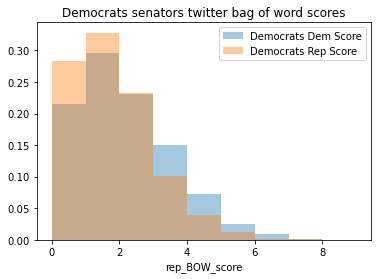

In [49]:
import seaborn as sns
import numpy as np

bins = np.arange(0,10,1)
sns.distplot(df[df['Party']=='D'].dem_BOW_score, bins=bins, kde =False, norm_hist = True, label = 'Democrats Dem Score')
sns.distplot(df[df['Party']=='D'].rep_BOW_score, bins=bins, kde =False, norm_hist = True, label = 'Democrats Rep Score')
plt.title('Democrats senators twitter bag of word scores')
plt.legend()

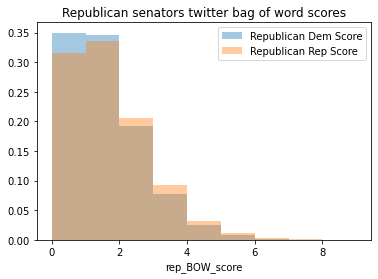

In [50]:
sns.distplot(df[df['Party']=='R'].dem_BOW_score, bins=bins, kde =False,norm_hist = True, label = 'Republican Dem Score')
sns.distplot(df[df['Party']=='R'].rep_BOW_score, bins=bins, kde =False,norm_hist = True, label = 'Republican Rep Score')
plt.title('Republican senators twitter bag of word scores')
plt.legend()

In [51]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

#nltk.download('averaged_perceptron_tagger')
# ok starting from here we are going to use the Tf-idf vectorization method, which is bag of word including the 
# cosine similiarity, and grams analysis
# inorder for us to do that we have do a better job of stemming by first giving proposition of the words 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


lemmatizer = WordNetLemmatizer() 

df['lem_token_wPOS'] = df['lem_token'].apply(lambda words: [lemmatizer.lemmatize(word, get_wordnet_pos(word))
 for word in words])



In [52]:
#  now the stemming is complete let turn it into sentence
df['len_sentence'] = df['lem_token_wPOS'].apply(lambda words: ' '.join(words))
df['len_sentence']

0        congrats petersburg medical center ceo phil ho...
1        change make legislation go long way improve qu...
2        im proud introduce tribal health data improvem...
3        american indian amp alaska native community fa...
4        congrats alaskan eddy falcon jr tafilisaunoa t...
                               ...                        
17119           stay focus folk let get work join campaign
17120        donald trump unfit lead nation dont take word
17121                            realdonaldtrump didnt bad
17122    person responsible fail covid response donald ...
17123    together united love america well overcome sea...
Name: len_sentence, Length: 17124, dtype: object

In [53]:
#  here what we are going to do is generate a model of republican leader

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

rep_Tfidf = TfidfVectorizer(stop_words=stop_words,   ngram_range=(1,3))
rep_Tfidf.fit_transform(df[df['politican'].isin(rep_leaders)].len_sentence)

rep_words = rep_Tfidf.get_feature_names()
len(rep_Tfidf.get_feature_names())


#df[df['politican'].isin(rep_leaders)].len_sentence
#df[df['politican'].isin(rep_leaders)].tweet_web_r


10046

In [54]:
#  We do the same thing but with democrats leader


dem_Tfidf = TfidfVectorizer(stop_words=stop_words,   ngram_range=(1,3))
dem_Tfidf.fit_transform(df[df['politican'].isin(dem_leaders)].len_sentence )
dem_words = dem_Tfidf.get_feature_names()
len(dem_Tfidf.get_feature_names())

14128

In [55]:
#list(set(rep_words).difference(dem_words)) #len is 9212
overlapping_words = set(rep_words).intersection(set(dem_words)) # the length is 1089
#rep_words =  list(set(rep_words).difference(dem_words))
overlapping_words

{'four year',
 'independence',
 'attend',
 'school',
 'leadership',
 'donor',
 'sacrifice',
 'payment',
 'office',
 'much',
 'volunteer',
 'dream',
 'amendment',
 'economy',
 'prioritize',
 'together',
 'assistance',
 'equal',
 'partisan',
 'treatment',
 'upon',
 'covid',
 'ground',
 'expert',
 'read',
 'new deal',
 'talk',
 'able',
 'commitment',
 'tv',
 'political spectrum',
 'green new deal',
 'el',
 'struggle family',
 'green new',
 'regardless',
 'happen',
 'important',
 'true',
 'meet',
 'late',
 'speed',
 'aid',
 'local',
 'across america',
 'glad',
 'ten million',
 'risk',
 'waste',
 'beat',
 'slow spread',
 'death',
 'integrity',
 'investigation',
 'get',
 'happy birthday',
 'action',
 'matter',
 'three year',
 'wear mask practice',
 'possible',
 'faith',
 'acknowledge',
 'majority',
 'restore',
 'religion',
 'collapse',
 'courage',
 'month',
 'safe',
 'reope',
 'end',
 'four',
 'whats',
 'make sure',
 'life risk',
 'secretary',
 'bill would',
 'protection',
 'american life',


In [56]:
df

,politican,Party,State,retweet,tweet_web_r,ARI,DCR,TS,lem_token,sentiment_score,sentiment,dem_BOW_score,rep_BOW_score,lem_token_wPOS,len_sentence
0,Lisa Murkowski,R,AK,False,Congrats to Petersburg Medical Center CEO Phil...,13.5,9.79,9.79,"[congrats, petersburg, medical, center, ceo, p...",0.7650,Positive,1,1,"[congrats, petersburg, medical, center, ceo, p...",congrats petersburg medical center ceo phil ho...
1,Lisa Murkowski,R,AK,False,The changes made by this legislation will go a...,10.6,8.44,8.44,"[change, made, legislation, go, long, way, imp...",0.4215,Positive,1,0,"[change, make, legislation, go, long, way, imp...",change make legislation go long way improve qu...
2,Lisa Murkowski,R,AK,False,I’m proud to introduce the Tribal Health Data ...,14.8,10.98,10.98,"[im, proud, introduce, tribal, health, data, i...",0.8316,Positive,2,2,"[im, proud, introduce, tribal, health, data, i...",im proud introduce tribal health data improvem...
3,Lisa Murkowski,R,AK,False,American Indian &amp; Alaska Native communitie...,11.6,9.63,9.63,"[american, indian, amp, alaska, native, commun...",0.0000,Neutral,4,2,"[american, indian, amp, alaska, native, commun...",american indian amp alaska native community fa...
4,Lisa Murkowski,R,AK,False,Congrats to Alaskans Eddy Falcon Jr. and Tafil...,11.4,10.16,10.16,"[congrats, alaskans, eddy, falcon, jr, tafilis...",0.6705,Positive,0,0,"[congrats, alaskan, eddy, falcon, jr, tafilisa...",congrats alaskan eddy falcon jr tafilisaunoa t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,D,P,False,"Just stay focused, folks.\n\nLet’s get to work...",4.9,6.78,6.78,"[stay, focused, folk, lets, get, work, join, c...",0.5859,Positive,0,2,"[stay, focus, folk, let, get, work, join, camp...",stay focus folk let get work join campaign
17120,Joe Biden,D,P,False,Donald Trump is unfit to lead our nation. But ...,1.4,6.99,6.99,"[donald, trump, unfit, lead, nation, dont, tak...",0.0000,Neutral,3,2,"[donald, trump, unfit, lead, nation, dont, tak...",donald trump unfit lead nation dont take word
17121,Joe Biden,D,P,False,.@realDonaldTrump it didn’t have to be this bad.,6.7,7.98,7.98,"[realdonaldtrump, didnt, bad]",-0.6280,Negative,0,1,"[realdonaldtrump, didnt, bad]",realdonaldtrump didnt bad
17122,Joe Biden,D,P,False,The only person responsible for our failed COV...,9.3,8.18,8.18,"[person, responsible, failed, covid, response,...",-0.2500,Negative,2,1,"[person, responsible, fail, covid, response, d...",person responsible fail covid response donald ...


In [57]:
#now lets convert them into dataframe and add in name and party
rep_vectorize = pd.DataFrame(rep_Tfidf.transform(df['len_sentence']).toarray(), columns= rep_Tfidf.get_feature_names())#.sum(axis = 1)
dem_vectorize = pd.DataFrame(dem_Tfidf.transform(df['len_sentence']).toarray(), columns= dem_Tfidf.get_feature_names())

rep_vectorize['politican'] = df.politican
dem_vectorize['politican'] = df.politican

rep_vectorize['Party'] = df.Party
dem_vectorize['Party'] = df.Party

In [58]:
# lets look at the score of dem

dem_score = dem_vectorize.groupby(['politican', 'Party']).mean().sum(axis = 1)
dem_vectorize.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).head(20)


politican             Party
Elizabeth Warren      D        5.432198
Bernard Sanders       D        5.386588
Kamala D. Harris      D        5.286406
Joe Biden             D        5.000640
Patty Murray          D        3.177937
Charles E. Schumer    D        3.124244
Cory A. Booker        D        3.029961
Tammy Baldwin         D        3.013484
Doug Jones            D        2.991393
Margaret Wood Hassan  D        2.965355
Dianne Feinstein      D        2.964069
Ron Wyden             D        2.957468
Gary C. Peters        D        2.957016
Tammy Duckworth       D        2.950005
Tom Udall             D        2.949849
Sherrod Brown         D        2.946902
Richard J. Durbin     D        2.933221
Chris Van Hollen      D        2.927877
Benjamin L. Cardin    D        2.912592
Jeff Merkley          D        2.911598
dtype: float64

In [59]:
# lets look at the score of Rep

rep_score = rep_vectorize.groupby(['politican', 'Party']).mean().sum(axis = 1)
print(rep_vectorize.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).head(20))


politican              Party
Mitch McConnell        R        5.456422
Ted Cruz               R        5.279851
Mike Pence             R        4.971770
Donald Trump           R        4.202184
Patty Murray           D        2.927258
Kirsten E. Gillibrand  D        2.869871
Doug Jones             D        2.802603
Jack Reed              D        2.794362
Charles E. Schumer     D        2.784419
Cory A. Booker         D        2.766720
Tom Udall              D        2.748044
Tammy Baldwin          D        2.746670
Benjamin L. Cardin     D        2.741626
Richard J. Durbin      D        2.733677
Debbie Stabenow        D        2.720752
Ron Wyden              D        2.720437
Michael B. Enzi        R        2.719976
Joe Biden              D        2.709450
Thom Tillis            R        2.706295
John Barrasso          R        2.705259
dtype: float64


Text(0.5, 1.0, 'Distruption Dem Score vs Rep Score')

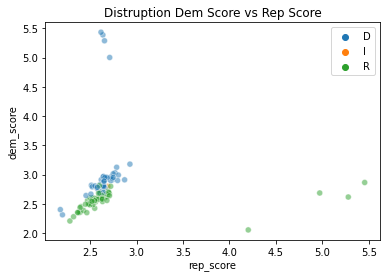

In [60]:
#lets graph it

import seaborn as sns

score_df = pd.DataFrame([rep_score,dem_score]).T
score_df.columns = ['rep_score', 'dem_score']
score_df

score_df['Party'] = score_df.index.get_level_values(1)
sns.scatterplot(x='rep_score', y='dem_score', data= score_df, hue = score_df.Party.tolist(), alpha = 0.5)
plt.title('Distruption Dem Score vs Rep Score')

(2.0, 3.25)

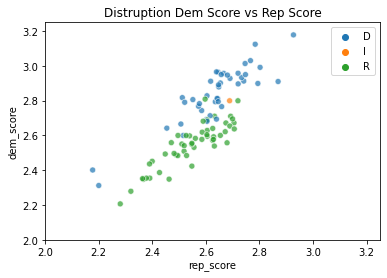

In [61]:
#  the graph looks amazing.  However, lets take a closer look inside by ignoring the train value

import seaborn as sns

score_df = pd.DataFrame([rep_score,dem_score]).T
score_df.columns = ['rep_score', 'dem_score']
score_df

score_df['Party'] = score_df.index.get_level_values(1)
sns.scatterplot(x='rep_score', y='dem_score', data= score_df, hue = score_df.Party.tolist(), alpha = 0.7)
plt.title('Distruption Dem Score vs Rep Score')
plt.xlim(2,3.25)
plt.ylim(2,3.25)

In [62]:
# ok lets graph the same thing but lets remove common word set found in both party
rep_vectorize_no_common = rep_vectorize.drop(columns=overlapping_words)
dem_vectorize_no_common = dem_vectorize.drop(columns=overlapping_words)
#overlapping_words

dem_score_no_common = dem_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1)
dem_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).head(20)


politican             Party
Elizabeth Warren      D        4.354354
Bernard Sanders       D        4.255821
Kamala D. Harris      D        4.159724
Joe Biden             D        3.749599
Charles E. Schumer    D        1.015746
Dianne Feinstein      D        0.976700
Margaret Wood Hassan  D        0.972894
Cory A. Booker        D        0.941028
Tammy Baldwin         D        0.935810
Susan M. Collins      R        0.933280
Tammy Duckworth       D        0.921543
Patty Murray          D        0.915809
Edward J. Markey      D        0.907815
Jeanne Shaheen        D        0.898454
Sherrod Brown         D        0.895512
Chris Van Hollen      D        0.894413
Jeff Merkley          D        0.886552
Gary C. Peters        D        0.882818
Richard J. Durbin     D        0.876315
Mark R. Warner        D        0.875215
dtype: float64

In [63]:
dem_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).tail(20)


politican             Party
Dan Sullivan          R        0.529873
Lindsey Graham        R        0.528673
Tim Scott             R        0.526986
Roger F. Wicker       R        0.516697
Richard C. Shelby     R        0.515721
Mike Braun            R        0.505146
Rand Paul             R        0.505026
Todd Young            R        0.499760
Steve Daines          R        0.487179
John Cornyn           R        0.484685
Ben Sasse             R        0.478455
Marco Rubio           R        0.475111
James E. Risch        R        0.470386
Mike Crapo            R        0.465268
Shelley Moore Capito  R        0.463909
Johnny Isakson        R        0.449430
Ted Cruz              R        0.000000
Mitch McConnell       R        0.000000
Donald Trump          R        0.000000
Mike Pence            R        0.000000
dtype: float64

In [64]:
rep_score_no_common = rep_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1)
rep_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).head(20)


politican         Party
Mitch McConnell   R        4.128948
Ted Cruz          R        4.094107
Mike Pence        R        3.623570
Donald Trump      R        3.258174
Dan Sullivan      R        0.746326
Tom Cotton        R        0.731058
Todd Young        R        0.722186
John Hoeven       R        0.690300
Thom Tillis       R        0.662866
Mike Braun        R        0.661482
Marsha Blackburn  R        0.659033
David Perdue      R        0.650148
John Thune        R        0.638680
Rob Portman       R        0.636659
Cory Gardner      R        0.636141
Kevin Cramer      R        0.627703
Rick Scott        R        0.625099
Mitt Romney       R        0.615677
Ron Johnson       R        0.614639
Steve Daines      R        0.614437
dtype: float64

In [65]:
rep_vectorize_no_common.groupby(['politican', 'Party']).mean().sum(axis = 1).sort_values(ascending= False).tail(20)


politican             Party
Patrick J. Leahy      D        0.373557
Jeanne Shaheen        D        0.372826
Gary C. Peters        D        0.365128
Christopher A. Coons  D        0.363193
Ron Wyden             D        0.353886
Margaret Wood Hassan  D        0.350362
Mazie K. Hirono       D        0.346842
Dianne Feinstein      D        0.337937
Sheldon Whitehouse    D        0.331247
Sherrod Brown         D        0.328530
Jeff Merkley          D        0.323278
Edward J. Markey      D        0.315448
Thomas R. Carper      D        0.308037
Charles E. Schumer    D        0.307854
Tammy Duckworth       D        0.302210
Tina Smith            D        0.296743
Bernard Sanders       D        0.000000
Joe Biden             D        0.000000
Kamala D. Harris      D        0.000000
Elizabeth Warren      D        0.000000
dtype: float64

Text(0.5, 1.0, 'Distruption Dem Score vs Rep Score with no common words')

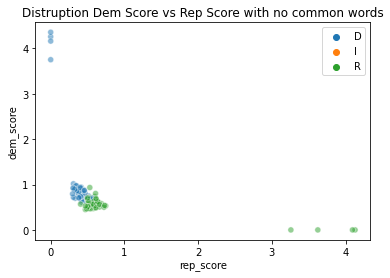

In [66]:
import seaborn as sns

score_df = pd.DataFrame([rep_score_no_common,dem_score_no_common]).T
score_df.columns = ['rep_score', 'dem_score']
score_df

score_df['Party'] = score_df.index.get_level_values(1)
sns.scatterplot(x='rep_score', y='dem_score', data= score_df, hue = score_df.Party.tolist(), alpha = 0.5)
plt.title('Distruption Dem Score vs Rep Score with no common words')


(0.0, 1.5)

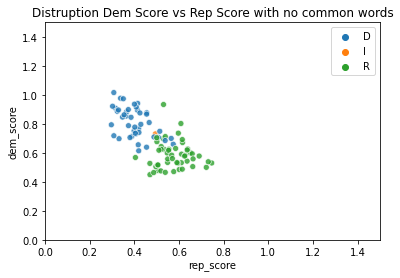

In [67]:
score_df = pd.DataFrame([rep_score_no_common,dem_score_no_common]).T
score_df.columns = ['rep_score', 'dem_score']
score_df

score_df['Party'] = score_df.index.get_level_values(1)
sns.scatterplot(x='rep_score', y='dem_score', data= score_df, hue = score_df.Party.tolist(), alpha = 0.8)
plt.title('Distruption Dem Score vs Rep Score with no common words')
plt.xlim(0,1.5)
plt.ylim(0,1.5)

In [68]:
df_final = df[['politican','Party','TS','sentiment_score']]

rep_vectorize_no_common = rep_vectorize_no_common.drop(['politican','Party'],axis =1)
dem_vectorize_no_common = dem_vectorize_no_common.drop(['politican','Party'], axis = 1)
df_final = pd.concat([df_final,rep_vectorize_no_common,dem_vectorize_no_common ], axis = 1 )
print(df_final.shape)


#df_final.to_pickle(one_level_up + '\\data\\processed\\09122020_tweets_vectorize.pkl')

(17124, 22000)


In [69]:
df_final = df[['politican','Party','TS','sentiment_score']]

rep_vectorize = rep_vectorize.drop(['politican','Party'],axis =1)
dem_vectorize = dem_vectorize.drop(['politican','Party'], axis = 1)
df_final = pd.concat([df_final,rep_vectorize,dem_vectorize ], axis = 1 )
print(df_final.shape)


#df_final.to_pickle(one_level_up + '\\data\\processed\\09122020_tweets_vectorize_wCommon.pkl')

(17124, 24178)
